In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import cauchy, gamma

import emcee
print(emcee.__version__)

import edward as ed
import numpy as np
import tensorflow as tf
from tensorflow.contrib.distributions.python.ops import bijectors as bijector
from edward.models import Deterministic, Normal, Gamma, StudentT, Exponential, NormalWithSoftplusScale

import itertools

ds = tf.contrib.distributions

2.2.1


In [2]:
ed.set_seed(42)
sess = ed.get_session()

In [3]:
num_points = 1000 # [100, 10000, 1000000]

In [4]:
mu_true = 5.0
sigma_true = 1.0

In [5]:
def build_dataset(N):
    #mu_latent = Normal([mu_mu_true],[mu_sigma_true])
    #sigma_latent = Gamma([sigma_c_true],[sigma_rate_true])
    
    x = Normal(loc=mu_true, scale=sigma_true, sample_shape=N)
    #x = Normal(loc=mu_latent, scale=sigma_latent, sample_shape=N)
    #y = Normal(loc=mu, scale=sigma, sample_shape=N)
    
    return sess.run(x)

In [6]:
x_train = build_dataset(num_points)

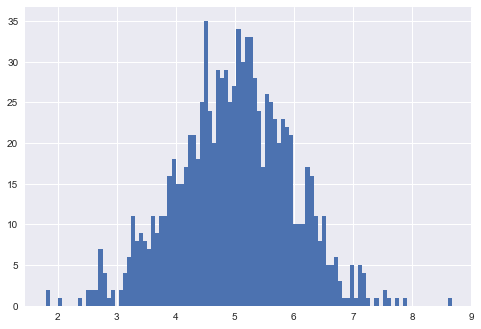

In [7]:
#print('mu: {}, sigma: {}'.format(mu_latent, sigma_latent))
plt.hist(x_train, bins=100)
plt.show()

In [8]:
N = x_train.shape[0]  # number of data points

In [24]:
#p_mu = Normal(loc=tf.zeros(N), scale=tf.ones(N))

p_mu = Normal([0.0],[1.0])

# p_sigma = ds.TransformedDistribution(
#   distribution=ds.Normal(loc=0., scale=1.),
#   bijector=bijector.Affine(
#     shift=-1.,
#     scale_identity_multiplier=2.,
#     event_ndims=0),
#   name="NormalTransformedDistribution")

p_sigma = Gamma([1.0],[1.0])

#p_sigma = Gamma(concentration=tf.ones(N), rate=tf.ones(N))
#p_sigma = ds.TransformedDistribution(
#  distribution=ds.Normal(loc=tf.zeros(N), scale=tf.ones(N)),
#  bijector=bijector.Exp(),
#  name="LogNormalTransformedDistribution")

In [25]:
x = Normal(tf.tile(p_mu,[N]), tf.tile(p_sigma,[N]))

In [26]:
q_mu = NormalWithSoftplusScale(loc=tf.Variable([0.5]),
            scale=tf.Variable([2.3]))

q_sigma = Exponential(tf.nn.softplus(tf.Variable([1.0])))

# q_sigma = ds.TransformedDistribution(
#   distribution=ds.Normal(loc=0., scale=1.),
#   bijector=bijector.Affine(
#     shift=-1.,
#     scale_identity_multiplier=2.,
#     event_ndims=0),
#   name="NormalTransformedDistribution")

#q_sigma = ds.TransformedDistribution(
#              distribution=ds.Normal(loc=tf.Variable(tf.random_normal([N])), 
#                                     scale=tf.nn.softplus(tf.Variable(tf.random_normal([N])))),
#              bijector=bijector.Exp(),
#              name="LogNormalTransformedDistribution")

In [28]:
inference = ed.KLqp({p_mu: q_mu, p_sigma: q_sigma}, data={x: x_train})

In [29]:
inference.run(n_iter=2000, n_print=200, n_samples=10)

2000/2000 [100%] ██████████████████████████████ Elapsed: 18s | Loss: 4456.857
